In [1]:
from google.colab.patches import cv2_imshow as imshow
from matplotlib import pyplot as plt
from collections import Counter
from PIL import Image
import numpy as np
import cv2 as cv
import urllib.request
import math

In [2]:
# !gdown --id '1nS17ZsqWyKQAfDqs5sEaYc6-tEob0m47' -O citra.jpg
!gdown --id '1UWv6Kzj-nWHLmvl1LApw_teLsdmp7hfm' -O citra.jpg

/usr/local/lib/python3.9/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1UWv6Kzj-nWHLmvl1LApw_teLsdmp7hfm
To: /content/citra.jpg
100% 141k/141k [00:00<00:00, 51.7MB/s]


### RGB to CMYK

In [3]:
# RGB to CMYK
def RGBtoCMY(pixel):
  # print('pixel awal:', pixel)
  r = float(pixel[2])
  g = float(pixel[1])
  b = float(pixel[0])

  c = 255 - r
  m = 255 - g
  y = 255 - b

  # print('rgbtocmy', [c,m,y])
  # return [c,m,y]
  return np.array([c, m, y])

def convertToCMYK(img):
  if np.all((img == 0)):
    return 0

  # print(img)

  u = 0.5
  b = 1
  
  tinggi, lebar = img.shape[0], img.shape[1]

  cmyk = np.zeros([tinggi, lebar, 4], np.uint8)

  for y in range(tinggi):
    for x in range(lebar):
      kp = min(RGBtoCMY(img[y,x]))
      if kp == 255:
        cmyk[y,x] = [0,0,0,0]
      else:
        cmyk[y,x] = pratt(img[y,x][0], img[y,x][1], img[y,x][2], u, b)

  return cmyk
        

def pratt(b, g, r, u, bk):
  kp = min(255-b, 255-g, 255-r)
  c = 255 - r - u * kp
  m = 255 - g - u * kp
  y = 255 - b - u * kp
  k = bk * kp

  # print('pratt', [c,m,y,k])
  return [c,m,y,k]
  # return np.array([c,m,y,k])


###Statistika Warna

In [18]:
def rerata(img):
  m, n = img.shape[0], img.shape[1]
  temp = np.sum(img, axis=0)
  temp2 = np.sum(temp, axis=0)
  result = np.array([(1/(m*n))*float(temp2[0]), (1/(m*n))*float(temp2[1]), (1/(m*n))*float(temp2[2])])
  return result


def varians(img, rerata):
  m, n = img.shape[0], img.shape[1]
  temp = np.sum((img-rerata)**2, axis=0)
  temp2 = np.sum(temp, axis=0)
  result = np.array([math.sqrt((1/(m*n))*float(temp2[0])), 
                     math.sqrt((1/(m*n))*float(temp2[1])), 
                     math.sqrt((1/(m*n))*float(temp2[2]))])
  return result


def skewness(img, rerata, varians):
  m, n = img.shape[0], img.shape[1]
  temp = np.sum((img-rerata)**3, axis=0)
  temp2 = np.sum(temp, axis=0)
  result = np.array([float(temp2[0])/(m*n*(varians[0]**3)),
                     float(temp2[1])/(m*n*(varians[1]**3)),
                     float(temp2[2])/(m*n*(varians[2]**3))
                     ])
  return result


def kurtosis(img, rerata, varians):
  m, n = img.shape[0], img.shape[1]
  temp = np.sum((img-rerata)**4, axis=0)
  temp2 = np.sum(temp, axis=0)
  result = np.array([(float(temp2[0])/(m*n*(varians[0]**4)))-3,
                     (float(temp2[1])/(m*n*(varians[1]**4)))-3,
                     (float(temp2[2])/(m*n*(varians[2]**4)))-3
                     ])
  return result


In [19]:
# testing statistika

req = urllib.request.urlopen('https://cf.shopee.co.id/file/4f5700f783083de5e4a5fa2f7adb0bd9')
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
img = cv.imdecode(arr, 3)

# img = cv.imread('citra.jpg')
# img = cv.resize(img, (300,270))
mean = rerata(img)
print('mean')
print(mean)
print()

var = varians(img, mean)
print('varians')
print(var)
print()

skew = skewness(img, mean, var)
print('skewness')
print(skew)
print()

kutor = kurtosis(img, mean, var)
print('kutorsis')
print(kutor)


mean
[103.55142709 156.45559696 116.52275586]

varians
[90.49946443 51.35292368 70.50847221]

skewness
[ 0.28589666 -0.22891927  0.25390948]

kutorsis
[-1.63344769 -0.99135199 -1.24685185]


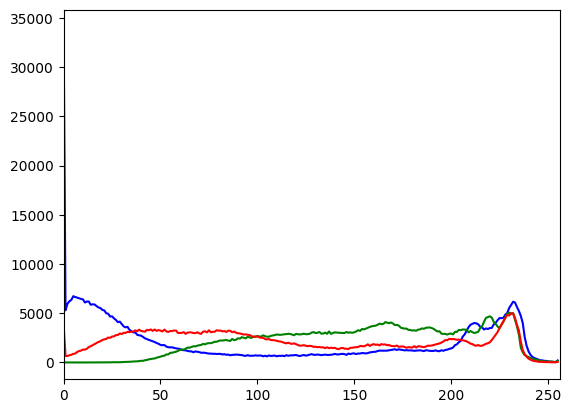

In [20]:
# img = cv.imread('home.jpg')
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

### Running Program

In [6]:
pixel = np.array([[[170, 215, 171]]])
test = convertToCMYK(pixel)
test

array([[[64, 20, 65, 40]]], dtype=uint8)

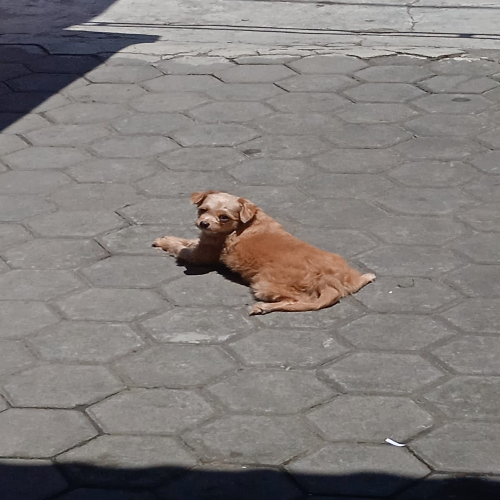

In [7]:
u = 0.5
b = 1

# take image

# req = urllib.request.urlopen('https://img.freepik.com/free-photo/young-attractive-man-isolated-white-background_185193-76399.jpg?w=2000')
# arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
# img = cv.imdecode(arr, 3)

img = cv.imread('citra.jpg')

img = cv.resize(img,(500, 500))
imshow(img)

cmy = convertToCMYK(img)

im = Image.fromarray(cmy, mode="CMYK")
im.save("citraCMYK.jpeg")

im2 = Image.fromarray(img)
im2.save("citraRGB.jpeg")